<a href="https://colab.research.google.com/github/YeceniaQuijada25/AluraStore/blob/main/alurastorelatam_ipynb_txt_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,"164,300.00","6,900.00",16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.61,-74.08
1,Mesa de comedor,Muebles,"192,300.00","8,400.00",18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25,-75.56
2,Juego de mesa,Juguetes,"209,600.00","15,900.00",15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.40,-75.51
3,Microondas,Electrodomésticos,"757,500.00","41,000.00",03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.44,-76.52
4,Silla de oficina,Muebles,"335,200.00","20,200.00",07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25,-75.56


In [ ]:
# Configurar pandas para que no use notación científica
pd.options.display.float_format = '{:,.2f}'.format

# Ahora al imprimir el DataFrame, los números se verán con comas

#1. Análisis de facturación



In [ ]:
#Alamacenar los DataFrame de las 4 tiendas en una lista

tiendas_lista=[tienda,tienda2,tienda3,tienda4]
nombres_lista=['Tienda 1','Tienda 2', 'Tienda 3', 'Tienda 4']


In [ ]:
def facturacion(tienda):
    ingreso_total= tienda['Precio'].sum()
    return float(ingreso_total)

ingresos=[]
ingresos=[facturacion(tienda) for tienda in tiendas_lista]
df_facturacion=pd.DataFrame(list(zip(nombres_lista,ingresos)),columns=['Nombre de la tiendas','Ingreso total'])
df_facturacion.to_csv('Facturación de las tiendas',index=False, sep=';')
df_facturacion.head()

,Nombre de la tiendas,Ingreso total
0,Tienda 1,"1,150,880,400.00"
1,Tienda 2,"1,116,343,500.00"
2,Tienda 3,"1,098,019,600.00"
3,Tienda 4,"1,038,375,700.00"


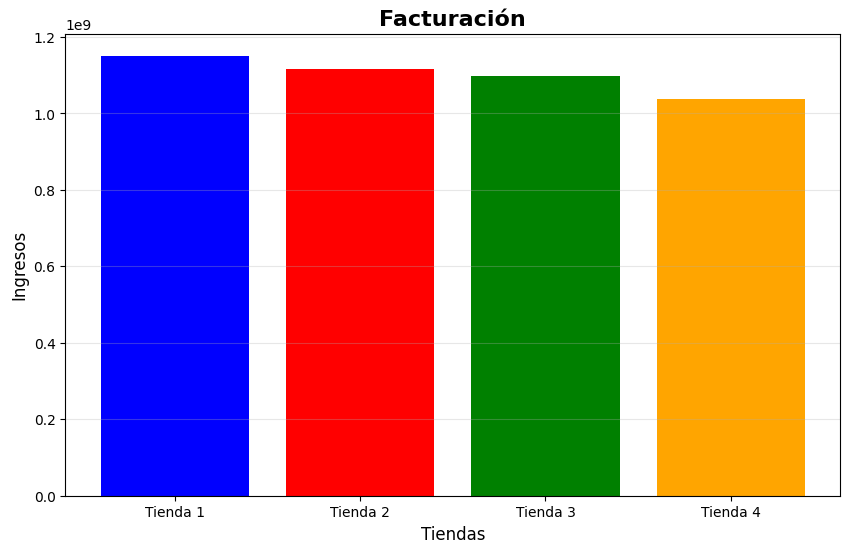

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(nombres_lista,ingresos,color=['blue','red','green','orange'])
plt.title('Facturación',fontsize=16,fontweight='bold')
plt.xlabel('Tiendas',fontsize=12)
plt.ylabel('Ingresos',fontsize=12)
plt.grid(axis='y',alpha=0.3)

# 2. Ventas por categoría

In [ ]:
def ventas_categoria(tienda,nombre):
    resultados=[]
    categoria_producto= tienda.groupby('Categoría del Producto').size().sort_values(ascending=False)
    for categoria,cantidad in categoria_producto.items():
         resultados.append({'Categoría del producto: ': categoria,'Cantidad:':cantidad})

    df_resultados=pd.DataFrame(resultados)
    df_resultados.to_csv(f'Ventas por categoría {nombre}', index=False,sep=';')
    df_resultados.head(100)
    return df_resultados

##Tienda 1

In [ ]:
#Tienda1
ventas_categoria(tienda,"Tienda")

,Categoría del producto:,Cantidad:
0,Muebles,465
1,Electrónicos,448
2,Juguetes,324
3,Electrodomésticos,312
4,Deportes y diversión,284
5,Instrumentos musicales,182
6,Libros,173
7,Artículos para el hogar,171


##Tienda 2

In [ ]:
#Tienda2
ventas_categoria(tienda2,"Tienda 2")

,Categoría del producto:,Cantidad:
0,Muebles,442
1,Electrónicos,422
2,Juguetes,313
3,Electrodomésticos,305
4,Deportes y diversión,275
5,Instrumentos musicales,224
6,Libros,197
7,Artículos para el hogar,181


##Tienda 3

In [ ]:
#Tienda3
ventas_categoria(tienda3,"Tienda 3")

,Categoría del producto:,Cantidad:
0,Muebles,499
1,Electrónicos,451
2,Juguetes,315
3,Electrodomésticos,278
4,Deportes y diversión,277
5,Libros,185
6,Artículos para el hogar,177
7,Instrumentos musicales,177


#Tienda 4

In [ ]:
#Tienda4
ventas_categoria(tienda4,"Tienda 4")

,Categoría del producto:,Cantidad:
0,Muebles,480
1,Electrónicos,451
2,Juguetes,338
3,Deportes y diversión,277
4,Electrodomésticos,254
5,Artículos para el hogar,201
6,Libros,187
7,Instrumentos musicales,170


# 3. Calificación promedio de la tienda


In [ ]:
promedios=[]
for nombre,df_tienda in zip(nombres_lista,tiendas_lista):
    promedio= df_tienda['Calificación'].mean()
    promedios.append({'Tienda':nombre,'Promedio de la calificación:':promedio})
#Convertir a DataFrame

df_promedios=pd.DataFrame(promedios)
df_promedios.to_csv('Calificación promedio por tienda',index=False,sep=';')
df_promedios.head()

,Tienda,Promedio de la calificación:
0,Tienda 1,3.98
1,Tienda 2,4.04
2,Tienda 3,4.05
3,Tienda 4,4.00


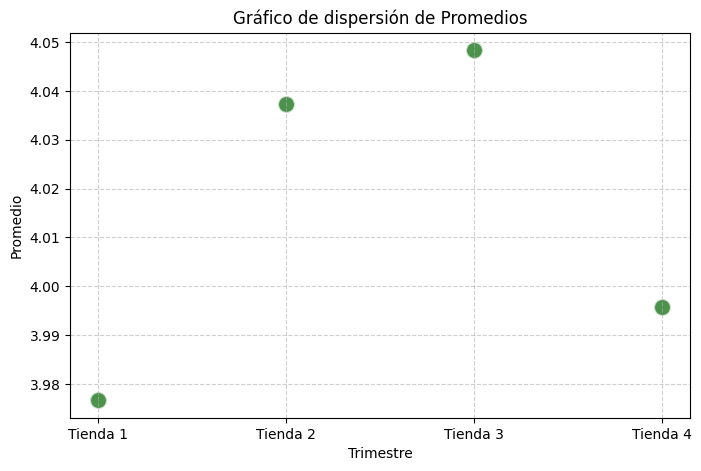

In [ ]:
plt.figure(figsize=(8,5))
promedios_valores = [p['Promedio de la calificación:'] for p in promedios]
plt.scatter(nombres_lista, promedios_valores, s=150, c='darkgreen', alpha=0.7, edgecolors='w', linewidth=1.5)
plt.title('Gráfico de dispersión de Promedios')
plt.xlabel('Trimestre')
plt.ylabel('Promedio')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 4. Productos más y menos vendidos

In [ ]:
#Alamacenar los DataFrame de las 4 tiendas en una lista


result=[]
result2=[]
for nombre,df_tienda in zip(nombres_lista,tiendas_lista):
    lista_productos= df_tienda['Producto'].tolist()

    cantidad={}

    for producto in lista_productos:
        cantidad[producto]= cantidad.get(producto,0)+1

    menor=min(cantidad,key=cantidad.get)
    mayor=max(cantidad,key=cantidad.get)
    result.append({'Tienda':nombre,'Productos más vendidos:':mayor,'Cantidad(Max):':cantidad[mayor],'Productos menos vendidos:':menor,'Cantidad(Min):':cantidad[menor]})

df_result=pd.DataFrame(result)
df_result.to_csv('Productos mas vendidos y menos vendidos',index=False,sep=';')
df_result.head()

,Tienda,Productos más vendidos:,Cantidad(Max):,Productos menos vendidos:,Cantidad(Min):
0,Tienda 1,Microondas,60,Auriculares con micrófono,33
1,Tienda 2,Iniciando en programación,65,Juego de mesa,32
2,Tienda 3,Kit de bancas,57,Bloques de construcción,35
3,Tienda 4,Cama box,62,Guitarra eléctrica,33


# 5. Envío promedio por tienda

In [ ]:
envios=[]
def promedio_envio(tienda):
    envio_promedio=tienda['Costo de envío'].mean()
    return float(envio_promedio)
envios=[promedio_envio(tienda) for tienda in tiendas_lista]
df_envios=pd.DataFrame(list(zip(nombres_lista,envios)),columns=['Nombre de la tienda','Promedio'])
df_envios.to_csv('Promedio de los costos de envíos por tienda',index=False, sep=';')
df_envios.head()

,Nombre de la tienda,Promedio
0,Tienda 1,"26,018.61"
1,Tienda 2,"25,216.24"
2,Tienda 3,"24,805.68"
3,Tienda 4,"23,459.46"


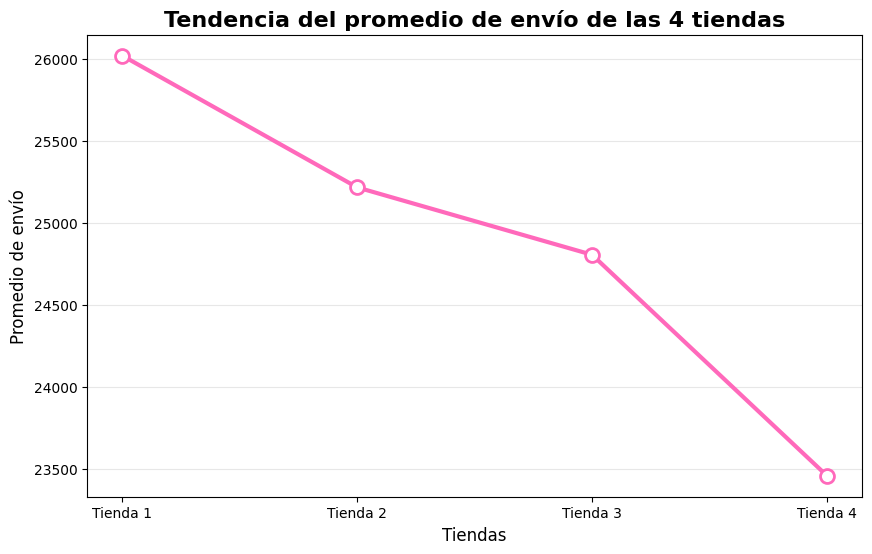

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(nombres_lista,envios,marker='o',linewidth=3,markersize=10,color='#FF69BB',markerfacecolor='White', markeredgewidth=2)
plt.title('Tendencia del promedio de envío de las 4 tiendas',fontsize=16,fontweight='bold')
plt.xlabel('Tiendas',fontsize=12)
plt.ylabel('Promedio de envío',fontsize=12)
plt.grid(axis='y', alpha=0.3)

#Extra

In [ ]:
import folium

def mapa(tienda,nombre):
# Crear mapa centrado en el promedio de las coordenadas
     mapa = folium.Map(location=[tienda['lat'].mean(), tienda['lon'].mean()],
    zoom_start=12)
# Añadir marcadores para cada venta
     for _, row in tienda.iterrows():
        folium.Marker(location=[row['lat'], row['lon']],
        popup=f"Producto: {row['Producto']}",
        tooltip=f"Venta en ({row['lat']}, {row['lon']})"
    ).add_to(mapa)

# Guardar el mapa
     mapa.save(f"mapa_ventas_{nombre}.html")
# Tienda 1
mapa(tienda,"Tienda1")
#Tienda 2
mapa(tienda2,"Tienda2")
#Tienda 3
mapa(tienda3,"Tienda3")
#Tienda 4
mapa(tienda4,"Tienda4")

#Informe

El propósito de este informe es decidir cuál tienda Sr. Juan debe vender, basándome en ingresos, satisfacción de clientes,eficiencia logística y patrones de venta. La idea es identificar cuál es la tienda que tiene un rendimiento deficiente en comparación con el resto( Tienda 1, Tienda 2, Tienda 3 y Tienda 4) para recomendar su cierre, permitiéndole Sr. Juan concentrar sus recursos en operaciones más rentables.
Análisis de factores
1. Ingresos totales: La tienda 4 tiene el ingreso más bajo comparado de las 4 tiendas estudiadas, con una diferencia de 113 millones con respecto a la tienda 1, mientras que con la tienda 2 es de 79 millones y también una diferencia de 60 millones aproximadamente. Indicando tener como desventaja menos ingresos que el resto.Teniendo en cuenta que la empresa con mayor ingresos es la tienda 1.
2. Categoría de los productos:
La tienda con mayor cantidad de ventas en la categoría de muebles es la tienda 3 y la con menos ventas es la tienda 2.
La tienda con mayor cantidad de ventas en la categoría de electrónica son las tiendas 3 y 4 y con menor ventas es la tienda 2.

3. Calificación promedio de los clientes:Aunque todas las calificaciones son altas, la Tienda 1 tiene la calificación ligeramente más baja. La Tienda 4 se sitúa justo por debajo de la media general, sin destacar negativamente.

4. Envío promedio por tienda: La Tienda 4 tiene el  envío promedio más bajo. Esto es una fortaleza, ya que sugiere que su coste  de envío es la más barata.

En conclusión el Sr. Juan debe considerar vender la tienda 4, debido a sus bajos ingresos a pesar de tener la fortaleza de coste de envío económico. La razón de que la tienda 4 debe cerrar es porque es menos rentable.